In [2]:
!pip install lifelines
import lifelines
from lifelines.utils import concordance_index
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
import scipy.stats
from scipy.stats import chi2
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,plot_roc_curve
import warnings
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')
%matplotlib inline

Defaulting to user installation because normal site-packages is not writeable
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4048 sha256=154ac66bec03c4e3dbdc067c0481f4e25a92f5238e3937cd4f07342411e6d269
  Stored in directory: c:\users\vridhi\appdata\local\pip\cache\wheels\a8\03\64\8557323821d25118c3a2dc1646996f7a962a8970d4b7d22473
Successfully built autograd-gamma


In [4]:
#load the data to dataframe
df = pd.read_excel("Employee_attrition_case study.xlsx", sheet_name="Data")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [7]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [5]:
for col in df.columns:
    print(col)

Age
Attrition
BusinessTravel
DailyRate
Department
DistanceFromHome
Education
EducationField
EmployeeCount
EmployeeNumber
EnvironmentSatisfaction
Gender
HourlyRate
JobInvolvement
JobLevel
JobRole
JobSatisfaction
MaritalStatus
MonthlyIncome
MonthlyRate
NumCompaniesWorked
Over18
OverTime
PercentSalaryHike
PerformanceRating
RelationshipSatisfaction
StandardHours
StockOptionLevel
TotalWorkingYears
TrainingTimesLastYear
WorkLifeBalance
YearsAtCompany
YearsInCurrentRole
YearsSinceLastPromotion
YearsWithCurrManager


In [9]:
cat_col=df.select_dtypes(include='object').columns
cat_col

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

In [10]:
num_col=df.select_dtypes(include='int64')
num_col

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,1,2,94,3,2,4,5993,19479,8,11,3,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,2,3,61,2,2,2,5130,24907,1,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,4,92,2,1,3,2090,2396,6,15,3,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,5,4,56,3,1,3,2909,23159,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,7,1,40,3,1,2,3468,16632,9,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,1,2061,3,41,4,2,4,2571,12290,4,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,613,6,1,1,2062,4,42,2,3,1,9991,21457,4,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,155,4,3,1,2064,2,87,4,2,2,6142,5174,1,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,1023,2,3,1,2065,4,63,2,2,2,5390,13243,2,14,3,4,80,0,17,3,2,9,6,0,8


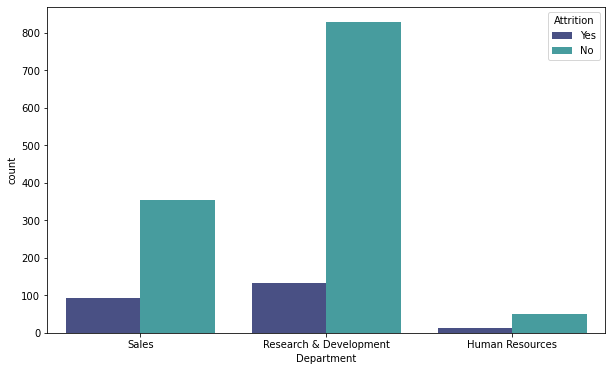

In [11]:
plt.figure(figsize = (10,6))
ax = sns.countplot(x = df['Department'], hue = df['Attrition'], palette='mako')

fraction wise R&D has minimum employee attrition

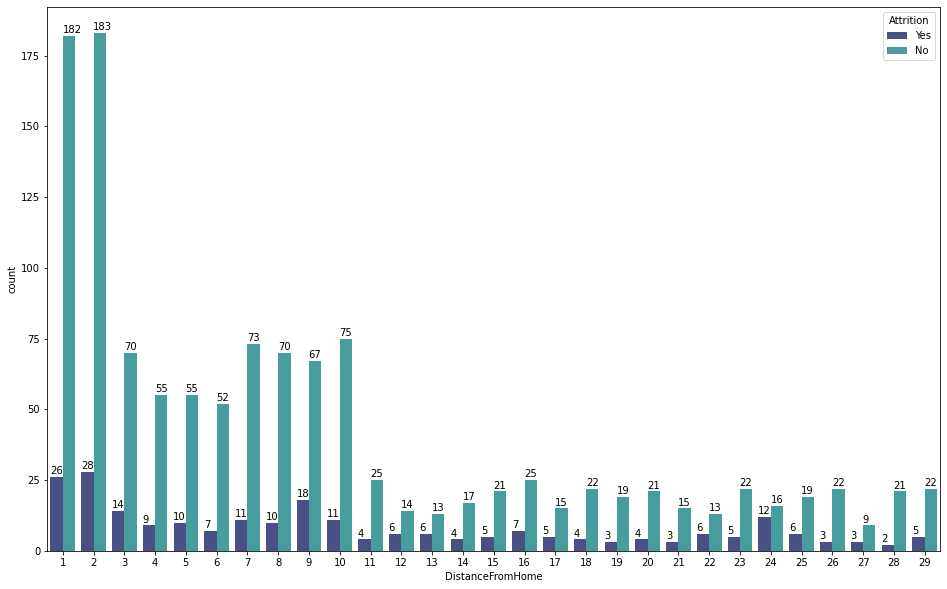

In [12]:
plt.figure(figsize = (16,10))
ax = sns.countplot(x = df['DistanceFromHome'], hue = df['Attrition'], palette='mako')
for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()-0.01, p.get_height()+1))

Fraction wise increase in Distance from H shows increase in number of employees attrition

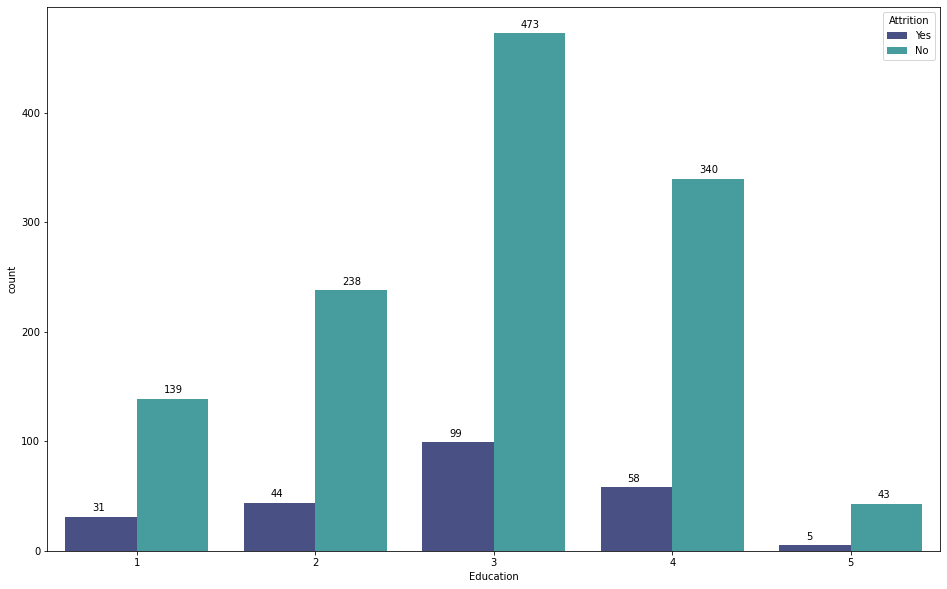

In [13]:
plt.figure(figsize = (16,10))
ax = sns.countplot(x = df['Education'], hue = df['Attrition'],palette='mako')

for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+5))


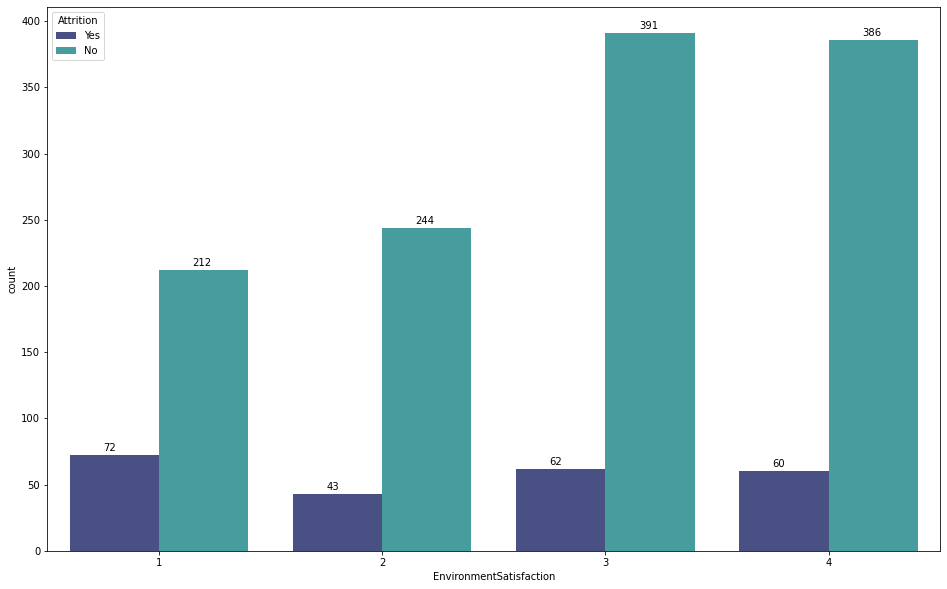

In [14]:
plt.figure(figsize = (16,10))
ax = sns.countplot(x = df['EnvironmentSatisfaction'], hue = df['Attrition'], palette='mako')

for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+3))

fraction wise Environment Satisfaction subcategory 3-4 have least chance of employees attrition

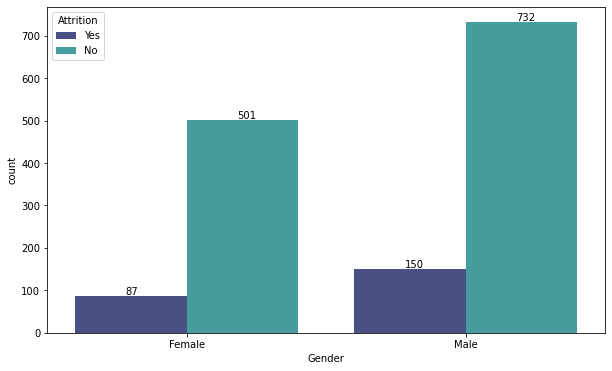

In [15]:
plt.figure(figsize = (10,6))
ax = sns.countplot(x = df['Gender'], hue = df['Attrition'], palette='mako')

for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.18, p.get_height()+3))

% wise male employees have ~3% more chance of employees attrition

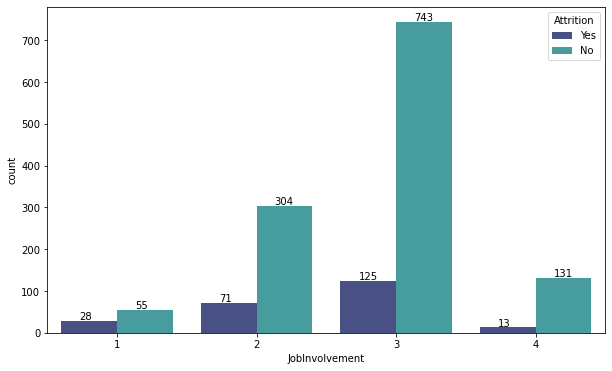

In [16]:
plt.figure(figsize = (10,6))
ax = sns.countplot(x = df['JobInvolvement'], hue = df['Attrition'], palette='mako')

for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.13, p.get_height()+3))

Fraction wise Job Involvment 1 has ~50% chance of attrition

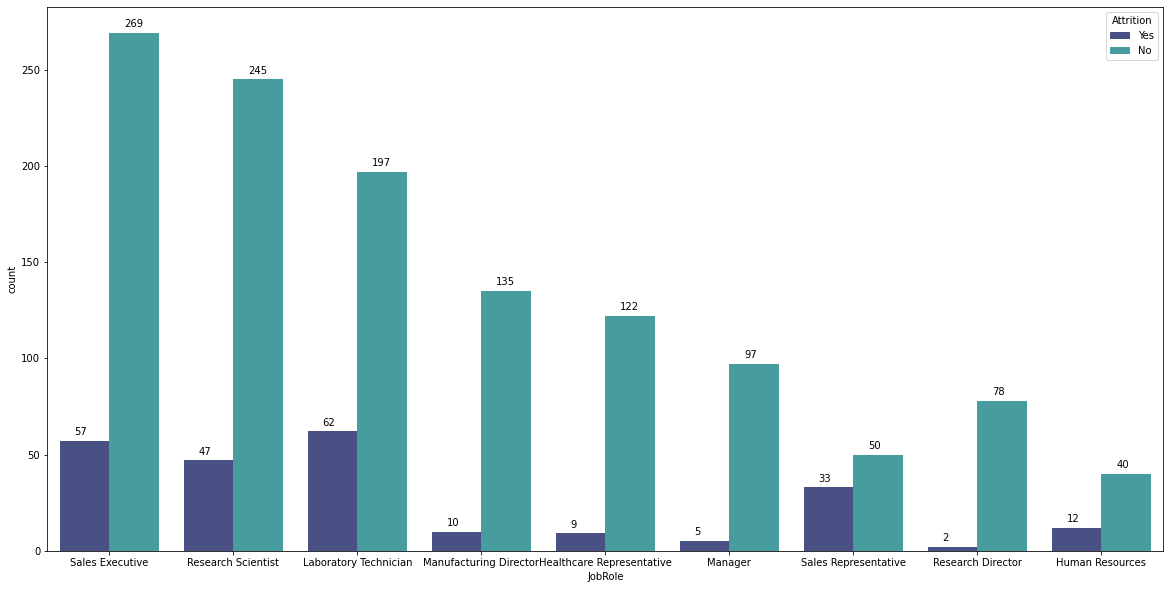

In [17]:
plt.figure(figsize = (20,10))
ax = sns.countplot(x = df['JobRole'], hue = df['Attrition'], palette='mako')

for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.12, p.get_height()+3))

Fraction wise Sales Representative has maximum chances of attrition and Research Director has minimum
While Laboratory Technician Employees has maximum number of attrition

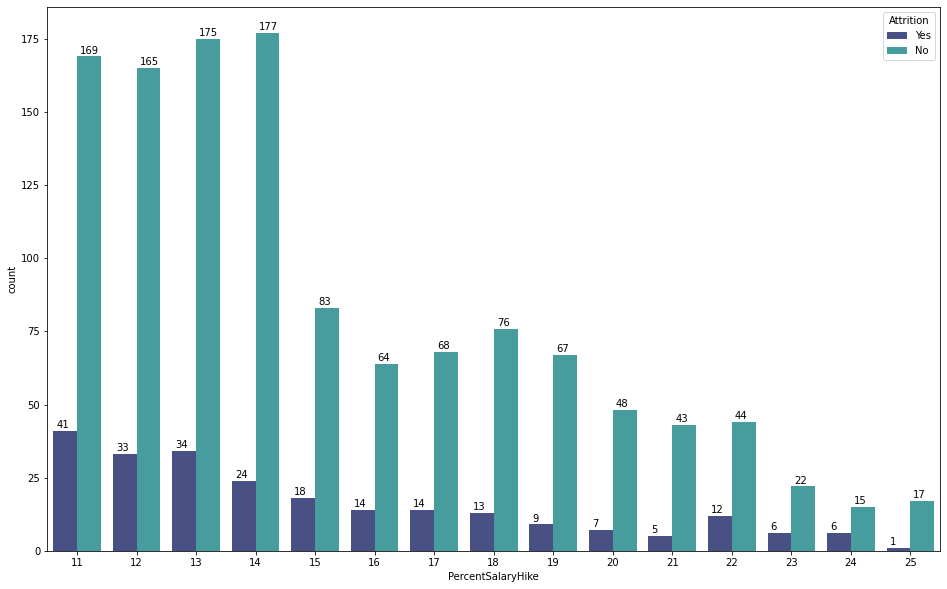

In [18]:
plt.figure(figsize = (16,10))
ax = sns.countplot(x = df['PercentSalaryHike'], hue = df['Attrition'], palette='mako')

for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.05, p.get_height()+1))

From the visualisation less percengtage hike hits more employees attrition

In [19]:
for column in df.columns:
    if df[column].dtype == object:
        print(str(column) + ' : ' + str(df[column].unique()))
        print(df[column].value_counts())
        print("------------------------------------------------------------------ ---------------------")

Attrition : ['Yes' 'No']
No     1233
Yes     237
Name: Attrition, dtype: int64
------------------------------------------------------------------ ---------------------
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
------------------------------------------------------------------ ---------------------
Department : ['Sales' 'Research & Development' 'Human Resources']
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
------------------------------------------------------------------ ---------------------
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
----

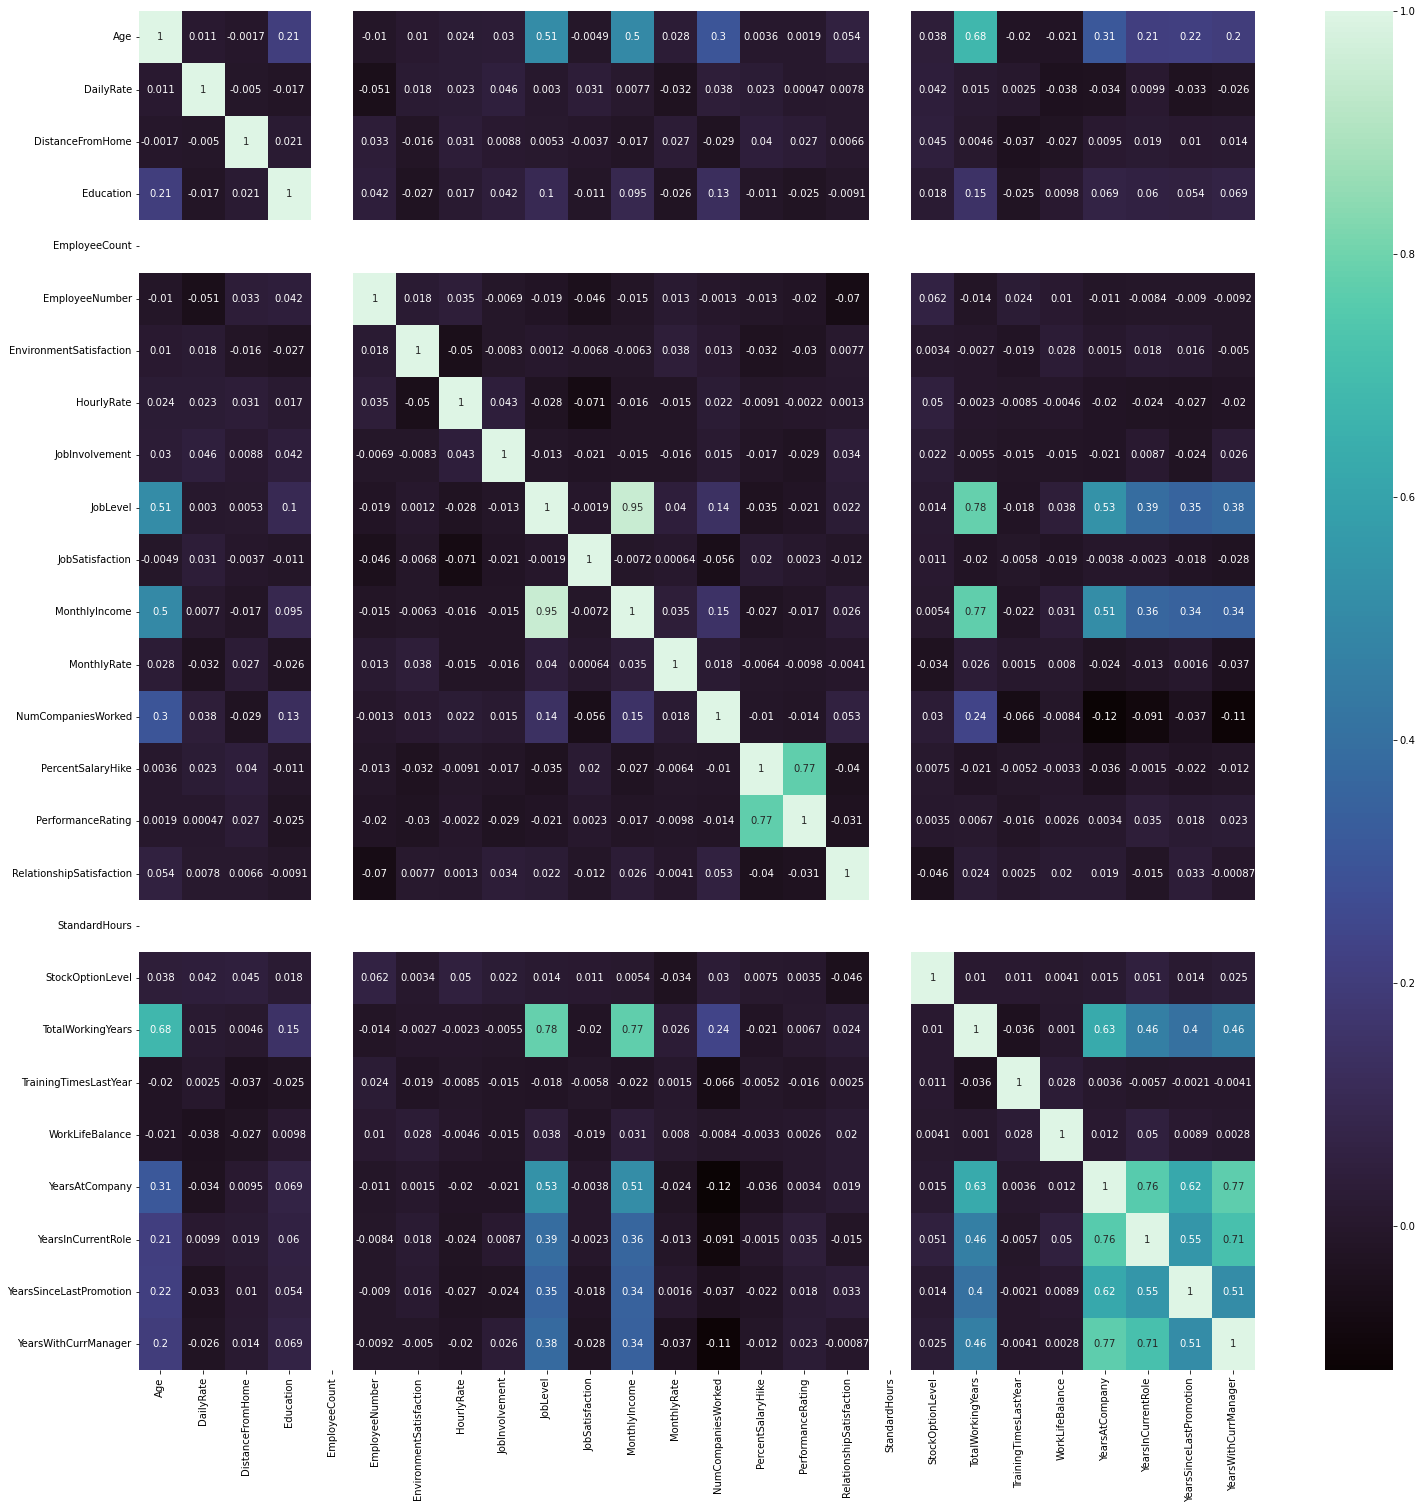

In [17]:
plt.figure(figsize=(25,25))
sns.heatmap(num_col.corr(),annot=True,cmap='mako')
plt.show()

In [18]:
def chi2_by_hand(df, col1, col2):    
    #---create the contingency table---
    df_cont = pd.crosstab(index = df[col1], columns = df[col2])
    display(df_cont)
    #---calculate degree of freedom---
    degree_f = (df_cont.shape[0]-1) * (df_cont.shape[1]-1)
    #---sum up the totals for row and columns---
    df_cont.loc[:,'Total']= df_cont.sum(axis=1)
    df_cont.loc['Total']= df_cont.sum()
    print('---Observed (O)---')
    display(df_cont)
    #---create the expected value dataframe---
    df_exp = df_cont.copy()    
    df_exp.iloc[:,:] = np.multiply.outer(df_cont.sum(1).values,df_cont.sum().values)
    df_cont.sum().sum()            
    print('---Expected (E)---')
    display(df_exp)
        
    # calculate chi-square values
    df_chi2 = ((df_cont - df_exp)**2) / df_exp    
    df_chi2.loc[:,'Total']= df_chi2.sum(axis=1)
    df_chi2.loc['Total']= df_chi2.sum()
    
    print('---Chi-Square---')
    display(df_chi2)
    #---get chi-square score---   
    chi_square_score = df_chi2.iloc[:-1,:-1].sum().sum()
    
    return chi_square_score, degree_f,df_chi2

In [19]:
chi_score, degree_f,df_chi2 = chi2_by_hand(df,'Attrition','MaritalStatus')
print(f'Chi2_score: {chi_score}, Degrees of freedom: {degree_f}')

MaritalStatus,Divorced,Married,Single
Attrition,,,
No,294,589,350
Yes,33,84,120


---Observed (O)---


MaritalStatus,Divorced,Married,Single,Total
Attrition,,,,
No,294,589,350,1233
Yes,33,84,120,237
Total,327,673,470,1470


---Expected (E)---


MaritalStatus,Divorced,Married,Single,Total
Attrition,,,,
No,1612764,3319236,2318040,7250040
Yes,309996,638004,445560,1393560
Total,1922760,3957240,2763600,8643600


---Chi-Square---


MaritalStatus,Divorced,Married,Single,Total
Attrition,,,,
No,1.612176e+06,3.318058e+06,2.317340e+06,1.449515e+07
Yes,3.099300e+05,6.378360e+05,4.453200e+05,2.786172e+06
Total,3.844212e+06,7.911788e+06,5.525320e+06,3.456264e+07


Chi2_score: 8640660.257850965, Degrees of freedom: 2


In [20]:
def chi2_by_hand(df, col1, col2):    
    #---create the contingency table---
    df_cont = pd.crosstab(index = df[col1], columns = df[col2])
    display(df_cont)
    ...
    chi_square_score = df_chi2.iloc[:-1,:-1].sum().sum()
    
    #---calculate the p-value---
    from scipy import stats
    p = stats.distributions.chi2.sf(chi_square_score, degree_f)

    return chi_square_score, degree_f, p

In [21]:
p1=[]
for i in cat_col:
    chi_score, degree_f, p = chi2_by_hand(df,'Attrition',i)
    p1.append(p)
print(f'Chi2_score: {chi_score}, Degrees of freedom: {degree_f}, p-value: {p}')

Attrition,No,Yes
Attrition,,
No,1233,0
Yes,0,237


BusinessTravel,Non-Travel,Travel_Frequently,Travel_Rarely
Attrition,,,
No,138,208,887
Yes,12,69,156


Department,Human Resources,Research & Development,Sales
Attrition,,,
No,51,828,354
Yes,12,133,92


EducationField,Human Resources,Life Sciences,Marketing,Medical,Other,Technical Degree
Attrition,,,,,,
No,20,517,124,401,71,100
Yes,7,89,35,63,11,32


Gender,Female,Male
Attrition,,
No,501,732
Yes,87,150


JobRole,Healthcare Representative,Human Resources,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative
Attrition,,,,,,,,,
No,122,40,197,97,135,78,245,269,50
Yes,9,12,62,5,10,2,47,57,33


MaritalStatus,Divorced,Married,Single
Attrition,,,
No,294,589,350
Yes,33,84,120


Over18,Y
Attrition,
No,1233
Yes,237


OverTime,No,Yes
Attrition,,
No,944,289
Yes,110,127


Chi2_score: 8640660.257850965, Degrees of freedom: 2, p-value: 0.0


In [22]:
p1

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [65]:
#Below code creates dummy variables

from tqdm import tqdm

def DummyVariableCreation(employee_data, column_names):
    for column_name in (column_names):
        unique_val = list(pd.unique(employee_data[column_name]))
        counter = len(unique_val)
        counter_dict = {}
        modified_list = []
        for i in range(counter):
            counter_dict[unique_val[i]] = i
        for i in range(len(employee_data)):
            modified_list.append(counter_dict[employee_data[column_name][i]])
        employee_data[column_name] = modified_list
        if len(list(pd.unique(modified_list))) > 2:
            unique_val = list(pd.unique(employee_data[column_name]))
            list_file_name = []
            for value in unique_val:
                file_name = column_name + '_{}'.format(value)
                list_file_name.append(file_name)
            for index in tqdm(range(len(list_file_name))):
                temp_list = []
                for i in range(len(employee_data[column_name])):
                    if employee_data[column_name][i] == index:
                        temp_list.append(1)
                    else:
                        temp_list.append(0)
                employee_data[list_file_name[index]] = temp_list
    return employee_data

In [67]:
df['Attrition'].replace("Yes",1,inplace = True)
df['Attrition'].replace("No",0,inplace= True)

In [68]:
column_names = {}
for column in df.columns:
    if df[column].dtype == object:
        column_names[column] = (list(pd.unique(df[column])))

In [23]:
df = DummyVariableCreation(df, column_names)

100%|██████████| 3/3 [00:00<00:00, 113.46it/s]


In [24]:
df = df.drop('Over18', axis =1 )
df = df.drop('EmployeeNumber', axis =1)
df = df.drop('StandardHours', axis =1) 
df = df.drop('EmployeeCount', axis =1)

In [25]:
#Buckting the continuous variables into 10 bins for those features with std>7.

def CreateBin(data):
    data_columns = data.columns
    for i in range(len(data_columns)):
        if isinstance(data[data_columns[i]][0], np.int64):
            if np.std(data[data_columns[i]]) >7 :
                new_name=data_columns[i]+'_Bins'
                data[new_name] = pd.qcut(data[data_columns[i]], 10, duplicates = 'drop').cat.codes
                data.drop(data_columns[i],axis=1,inplace=True)

In [26]:
CreateBin(df)
df

,Attrition,BusinessTravel,Department,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_0,BusinessTravel_1,BusinessTravel_2,Department_0,Department_1,Department_2,EducationField_0,EducationField_1,EducationField_2,EducationField_3,EducationField_4,EducationField_5,JobRole_0,JobRole_1,JobRole_2,JobRole_3,JobRole_4,JobRole_5,JobRole_6,JobRole_7,JobRole_8,MaritalStatus_0,MaritalStatus_1,MaritalStatus_2,Age_Bins,DailyRate_Bins,DistanceFromHome_Bins,HourlyRate_Bins,MonthlyIncome_Bins,MonthlyRate_Bins,TotalWorkingYears_Bins
0,1,0,0,2,0,2,0,3,2,0,4,0,8,0,11,3,1,0,0,1,6,4,0,5,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,6,7,0,8,6,7,3
1,0,1,1,1,0,3,1,2,2,1,2,1,1,1,23,4,4,1,3,3,10,7,1,7,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,8,1,4,4,5,9,4
2,1,0,1,2,1,4,1,2,1,2,3,0,6,0,15,3,2,0,3,3,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,5,9,0,8,0,0,3
3,0,1,1,4,0,4,0,3,1,1,3,1,1,0,11,3,3,0,3,3,8,7,3,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,3,9,1,3,2,8,3
4,0,0,1,1,2,1,1,3,1,2,2,1,9,1,12,3,4,1,3,3,2,2,2,2,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,3,0,1,3,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0,1,1,2,2,3,1,4,2,2,4,1,4,1,17,3,3,1,3,3,5,2,0,3,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,4,5,7,1,1,4,6
1466,0,0,1,1,2,4,1,2,3,4,1,1,4,1,15,3,1,1,5,3,7,7,1,7,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,6,3,3,1,8,7,4
1467,0,0,1,3,0,2,1,4,2,3,2,1,1,0,20,4,2,1,0,3,6,2,0,3,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,2,7,6,1,2
1468,0,1,0,3,2,4,1,2,2,0,2,1,2,1,14,3,4,0,3,2,9,6,0,8,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,8,6,0,4,5,4,6


Attrition


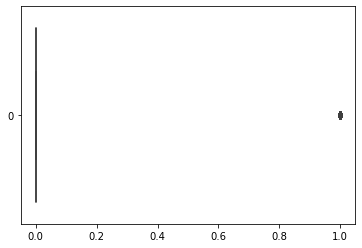

BusinessTravel


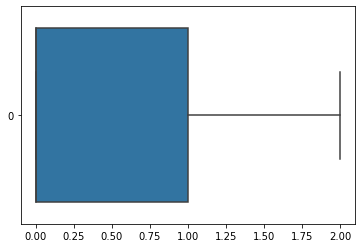

Department


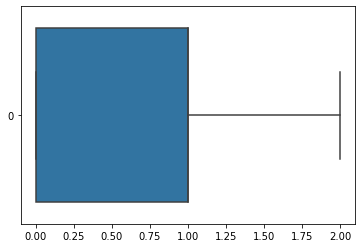

Education


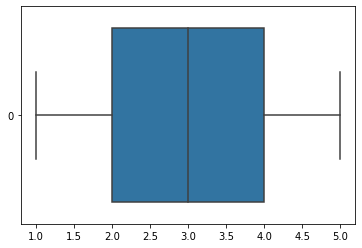

EducationField


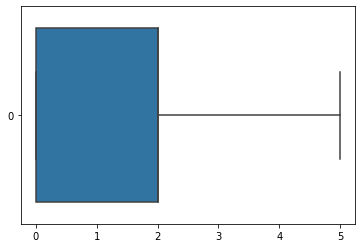

EnvironmentSatisfaction


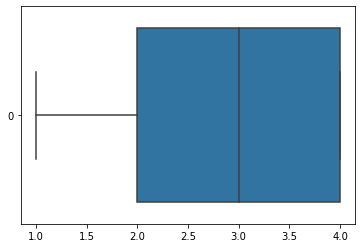

Gender


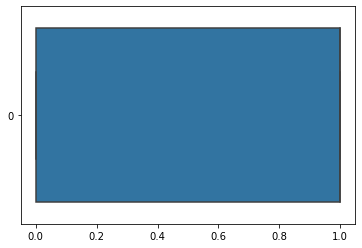

JobInvolvement


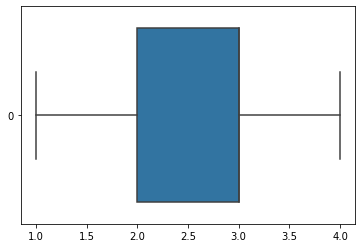

JobLevel


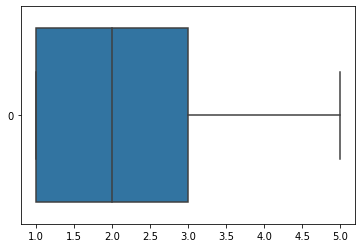

JobRole


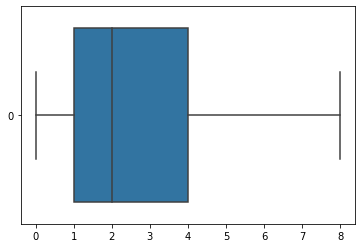

JobSatisfaction


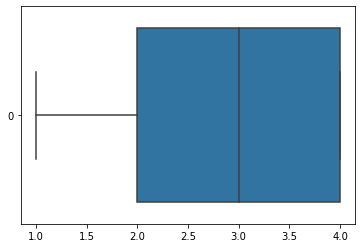

MaritalStatus


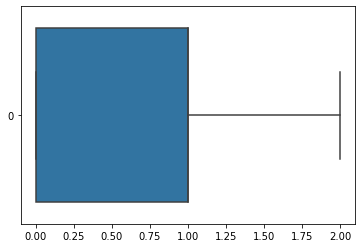

NumCompaniesWorked


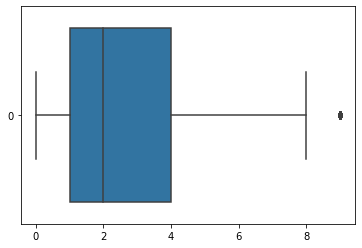

OverTime


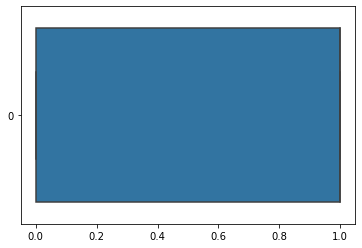

PercentSalaryHike


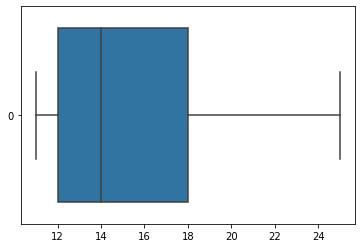

PerformanceRating


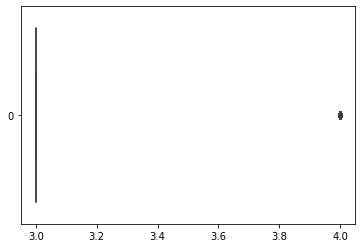

RelationshipSatisfaction


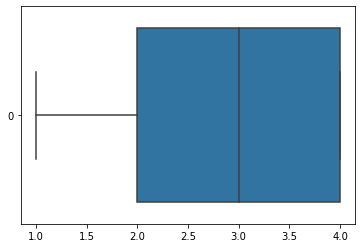

StockOptionLevel


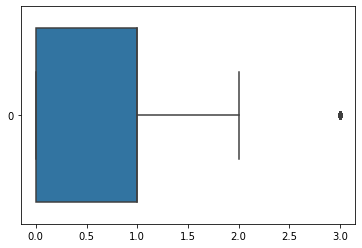

TrainingTimesLastYear


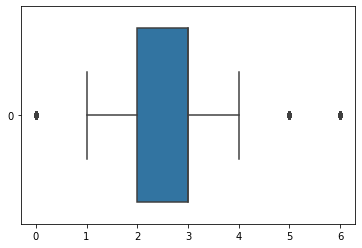

WorkLifeBalance


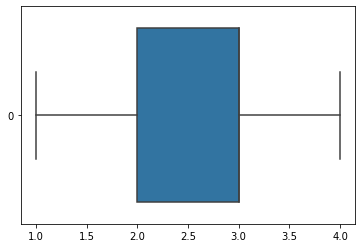

YearsAtCompany


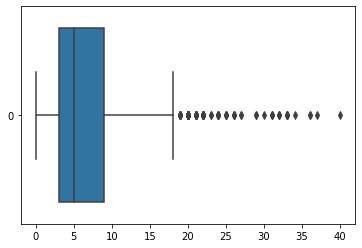

YearsInCurrentRole


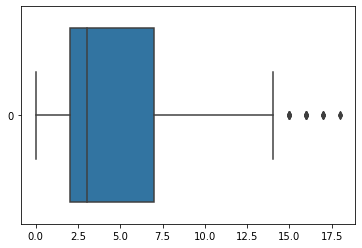

YearsSinceLastPromotion


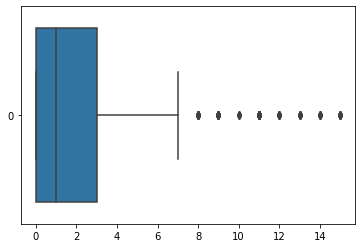

YearsWithCurrManager


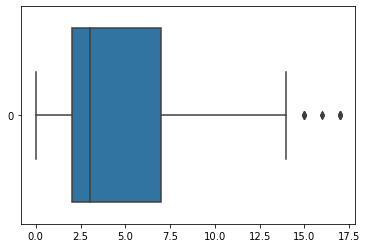

BusinessTravel_0


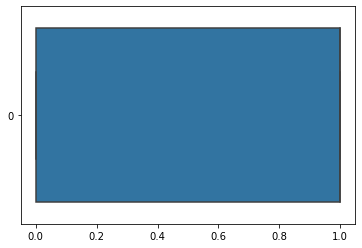

BusinessTravel_1


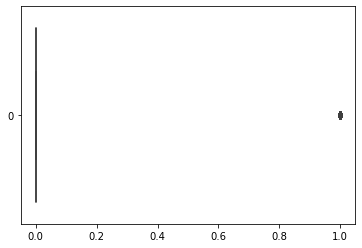

BusinessTravel_2


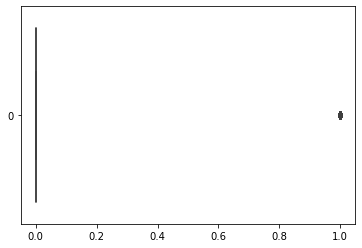

Department_0


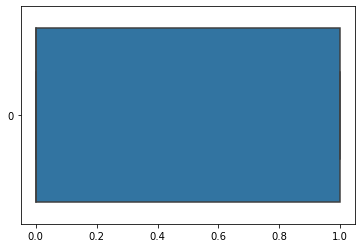

Department_1


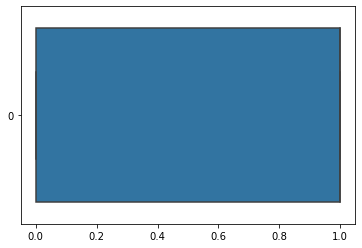

Department_2


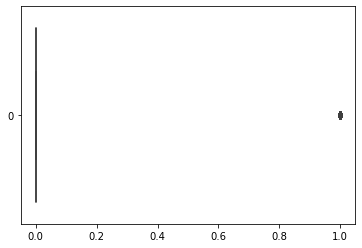

EducationField_0


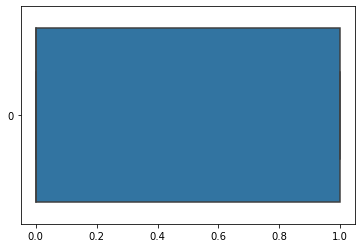

EducationField_1


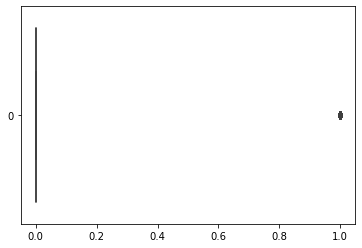

EducationField_2


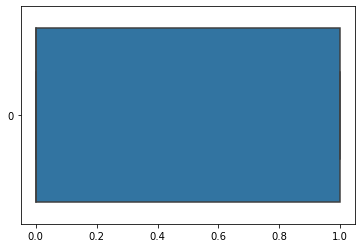

EducationField_3


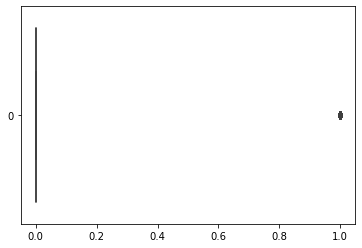

EducationField_4


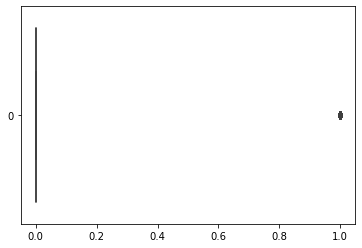

EducationField_5


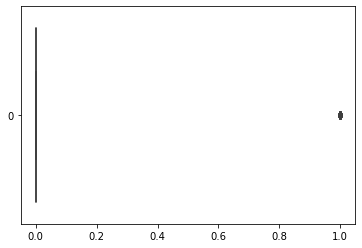

JobRole_0


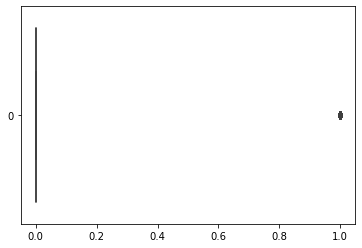

JobRole_1


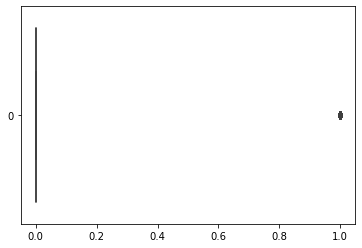

JobRole_2


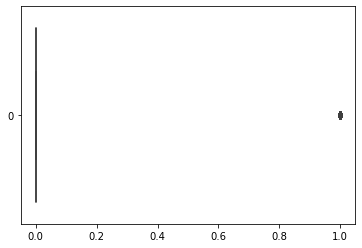

JobRole_3


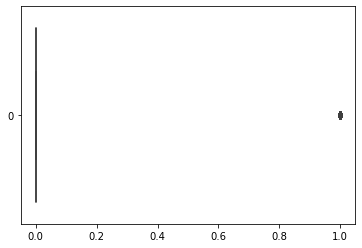

JobRole_4


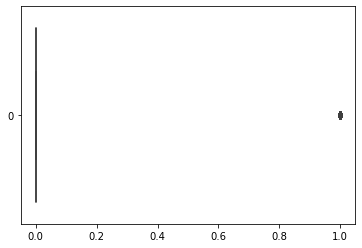

JobRole_5


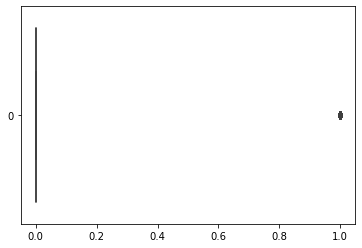

JobRole_6


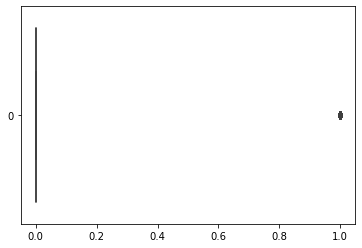

JobRole_7


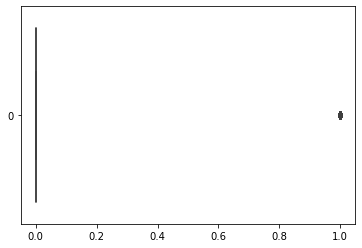

JobRole_8


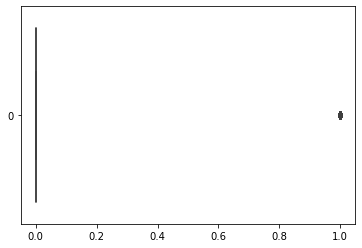

MaritalStatus_0


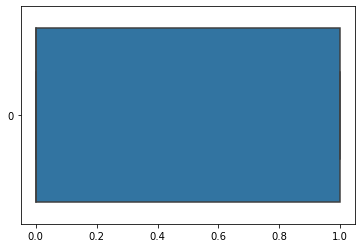

MaritalStatus_1


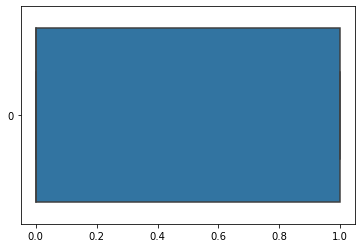

MaritalStatus_2


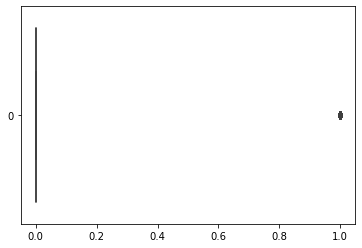

Age_Bins


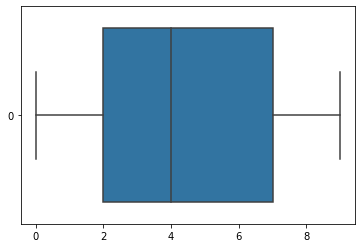

DailyRate_Bins


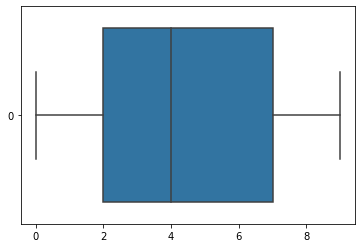

DistanceFromHome_Bins


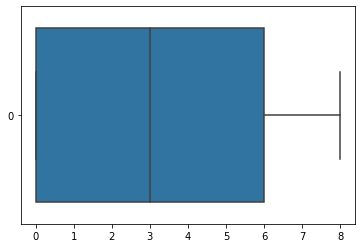

HourlyRate_Bins


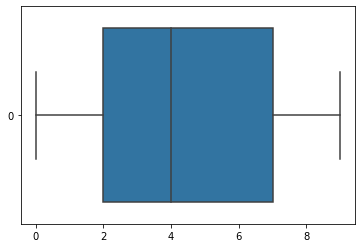

MonthlyIncome_Bins


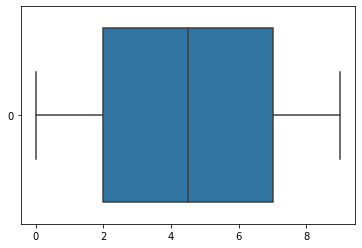

MonthlyRate_Bins


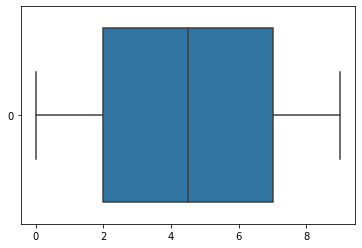

TotalWorkingYears_Bins


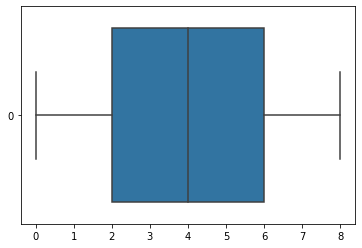

In [27]:
#Checking Outliers using BoxPlot

for i in df.columns:
    if df[i].dtype == object:
        continue
    else:
        print(i)
        sns.boxplot(data=df[i],orient='h')
        plt.show()

In [28]:
#USING IQR Method to remove  Outliers

columns = df.select_dtypes(include=np.number).columns 
for i in columns:
    l_75=df.select_dtypes(include=np.number)[i].quantile(0.75)
    l_25=df.select_dtypes(include=np.number)[i].quantile(0.25)
    iqr=l_75-l_25    
    ub=l_75+(1.5*iqr)
    lb=l_25-(1.5*iqr)
    uc=df.select_dtypes(include=np.number)[i].quantile(0.99)
    lc=df.select_dtypes(include=np.number)[i].quantile(0.1)
    for j in df.select_dtypes(include=np.number).index:        
        if df.select_dtypes(include=np.number).loc[j,i]>ub:            
            df.select_dtypes(include=np.number).loc[j,i]=uc        
        if df.select_dtypes(include=np.number).loc[j,i]<lb:            
            df.select_dtypes(include=np.number).loc[j,i]=lc

In [29]:
df

,Attrition,BusinessTravel,Department,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_0,BusinessTravel_1,BusinessTravel_2,Department_0,Department_1,Department_2,EducationField_0,EducationField_1,EducationField_2,EducationField_3,EducationField_4,EducationField_5,JobRole_0,JobRole_1,JobRole_2,JobRole_3,JobRole_4,JobRole_5,JobRole_6,JobRole_7,JobRole_8,MaritalStatus_0,MaritalStatus_1,MaritalStatus_2,Age_Bins,DailyRate_Bins,DistanceFromHome_Bins,HourlyRate_Bins,MonthlyIncome_Bins,MonthlyRate_Bins,TotalWorkingYears_Bins
0,1,0,0,2,0,2,0,3,2,0,4,0,8,0,11,3,1,0,2,1,6,4,0,5,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,6,7,0,8,6,7,3
1,0,1,1,1,0,3,1,2,2,1,2,1,1,1,23,4,4,1,3,3,10,7,1,7,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,8,1,4,4,5,9,4
2,1,0,1,2,1,4,1,2,1,2,3,0,6,0,15,3,2,0,3,3,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,5,9,0,8,0,0,3
3,0,1,1,4,0,4,0,3,1,1,3,1,1,0,11,3,3,0,3,3,8,7,3,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,3,9,1,3,2,8,3
4,0,0,1,1,2,1,1,3,1,2,2,1,9,1,12,3,4,1,3,3,2,2,2,2,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,3,0,1,3,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0,1,1,2,2,3,1,4,2,2,4,1,4,1,17,3,3,1,3,3,5,2,0,3,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,4,5,7,1,1,4,6
1466,0,0,1,1,2,4,1,2,3,4,1,1,4,1,15,3,1,1,6,3,7,7,1,7,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,6,3,3,1,8,7,4
1467,0,0,1,3,0,2,1,4,2,3,2,1,1,0,20,4,2,1,2,3,6,2,0,3,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,2,7,6,1,2
1468,0,1,0,3,2,4,1,2,2,0,2,1,2,1,14,3,4,0,3,2,9,6,0,8,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,8,6,0,4,5,4,6


In [30]:
#Function for calculating WoE and IV values for diffrent variables

def calculate_woe_iv(dataset, feature, target):
    lst = []
    for i in range(dataset[feature].nunique()):
        val = list(dataset[feature].unique())[i]
        lst.append({
            'Value': val,
            'All': dataset[dataset[feature] == val].count()[feature],
            'Good': dataset[(dataset[feature] == val) & (dataset[target] == 0)].count()[feature],
            'Bad': dataset[(dataset[feature] == val) & (dataset[target] == 1)].count()[feature]
        })
        
    dset = pd.DataFrame(lst)
    dset['Distr_Good'] = dset['Good'] / dset['Good'].sum()
    dset['Distr_Bad'] = dset['Bad'] / dset['Bad'].sum()
    dset['WoE'] = np.log(dset['Distr_Good'] / dset['Distr_Bad'])
    dset = dset.replace({'WoE': {np.inf: 0, -np.inf: 0}})
    dset['IV'] = (dset['Distr_Good'] - dset['Distr_Bad']) * dset['WoE']
    iv = dset['IV'].sum()
    
    dset = dset.sort_values(by='WoE')
    
    return dset, iv

In [31]:
for col in df.columns:
    if col == 'Attrition': continue
    else:
        print('WoE and IV for column: {}'.format(col))
        dftemp, iv = calculate_woe_iv(df, col, 'Attrition')
        print(dftemp)
        print('IV score: {:.2f}'.format(iv))
        if iv<0.02:
            df.drop(col,axis=1,inplace=True)
        print("------------------------------------------------------------------------------- ")
        print('\n')


WoE and IV for column: BusinessTravel
   Value   All  Good  Bad  Distr_Good  Distr_Bad       WoE        IV
1      1   277   208   69    0.168694   0.291139 -0.545714  0.066820
0      0  1043   887  156    0.719384   0.658228  0.088844  0.005433
2      2   150   138   12    0.111922   0.050633  0.793202  0.048615
IV score: 0.12
------------------------------------------------------------------------------- 


WoE and IV for column: Department
   Value  All  Good  Bad  Distr_Good  Distr_Bad       WoE        IV
0      0  446   354   92    0.287105   0.388186 -0.301637  0.030490
2      2   63    51   12    0.041363   0.050633 -0.202226  0.001875
1      1  961   828  133    0.671533   0.561181  0.179519  0.019810
IV score: 0.05
------------------------------------------------------------------------------- 


WoE and IV for column: Education
   Value  All  Good  Bad  Distr_Good  Distr_Bad       WoE        IV
1      1  170   139   31    0.112733   0.130802 -0.148659  0.002686
3      3  572  

   Value  All  Good  Bad  Distr_Good  Distr_Bad       WoE        IV
0      1   80    55   25    0.044607   0.105485 -0.860688  0.052397
3      4  153   126   27    0.102190   0.113924 -0.108700  0.001276
2      2  344   286   58    0.231955   0.244726 -0.053597  0.000684
1      3  893   766  127    0.621249   0.535865  0.147850  0.012624
IV score: 0.07
------------------------------------------------------------------------------- 


WoE and IV for column: YearsAtCompany
    Value  All  Good  Bad  Distr_Good  Distr_Bad       WoE        IV
2       0   44    28   16    0.022709   0.067511 -1.089530  0.048813
6       1  171   112   59    0.090835   0.248945 -1.008184  0.159404
4       2  127   100   27    0.081103   0.113924 -0.339812  0.011153
9       4  110    91   19    0.073804   0.080169 -0.082725  0.000527
12     12   14    14    0    0.011354   0.000000  0.000000  0.000000
11      3  128   108   20    0.087591   0.084388  0.037254  0.000119
1      10  120   102   18    0.082725   0

   Value   All  Good  Bad  Distr_Good  Distr_Bad       WoE        IV
1      1    52    40   12    0.032441   0.050633 -0.445173  0.008098
0      0  1418  1193  225    0.967559   0.949367  0.018981  0.000345
IV score: 0.01
------------------------------------------------------------------------------- 


WoE and IV for column: MaritalStatus_0
   Value   All  Good  Bad  Distr_Good  Distr_Bad       WoE        IV
0      1   470   350  120    0.283861   0.506329 -0.578704  0.128743
1      0  1000   883  117    0.716139   0.493671  0.372006  0.082760
IV score: 0.21
------------------------------------------------------------------------------- 


WoE and IV for column: MaritalStatus_1
   Value  All  Good  Bad  Distr_Good  Distr_Bad       WoE        IV
0      0  797   644  153    0.522303    0.64557 -0.211885  0.026118
1      1  673   589   84    0.477697    0.35443  0.298464  0.036791
IV score: 0.06
------------------------------------------------------------------------------- 


WoE and IV

In [32]:
df.head()

,Attrition,BusinessTravel,Department,EducationField,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,NumCompaniesWorked,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_1,BusinessTravel_2,Department_0,Department_1,EducationField_3,EducationField_4,JobRole_2,JobRole_3,JobRole_4,JobRole_5,JobRole_6,JobRole_7,MaritalStatus_0,MaritalStatus_1,MaritalStatus_2,Age_Bins,DailyRate_Bins,DistanceFromHome_Bins,HourlyRate_Bins,MonthlyIncome_Bins,MonthlyRate_Bins,TotalWorkingYears_Bins
0,1,0,0,0,2,3,2,0,4,0,8,0,11,1,0,2,1,6,4,0,5,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,6,7,0,8,6,7,3
1,0,1,1,0,3,2,2,1,2,1,1,1,23,4,1,3,3,10,7,1,7,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,8,1,4,4,5,9,4
2,1,0,1,1,4,2,1,2,3,0,6,0,15,2,0,3,3,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,5,9,0,8,0,0,3
3,0,1,1,0,4,3,1,1,3,1,1,0,11,3,0,3,3,8,7,3,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,3,9,1,3,2,8,3
4,0,0,1,2,1,3,1,2,2,1,9,1,12,4,1,3,3,2,2,2,2,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,3,0,1,3,5,2


In [33]:
X = df.drop('Attrition',axis=1)
Y = df['Attrition']

In [34]:
#Function that remove the first highly correlated feature from the X by giving a threshold
def cor(dataset,threshold):
    col_corr=set() #set of the names of highly correlated features
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if corr_matrix.iloc[i,j]>threshold:
                colname=corr_matrix.columns[i] # Getting the name of columns from correlation matrix above threshold
                col_corr.add(colname)
    return col_corr

In [35]:
corr_features = cor(X,0.7)
corr_features

{'BusinessTravel_2',
 'MaritalStatus_2',
 'MonthlyIncome_Bins',
 'TotalWorkingYears_Bins',
 'YearsInCurrentRole',
 'YearsWithCurrManager'}

In [36]:
#Now, removing these highly related values

X.drop(corr_features,axis=1,inplace=True)
X.shape

(1470, 36)

In [37]:
sc_x = StandardScaler()
X = sc_x.fit_transform(X) 

In [38]:
X

array([[-0.59004834, -1.40151234, -1.02186266, ..., -1.18858741,
         1.24350394,  0.87038828],
       [ 0.91319439,  0.49381714, -1.02186266, ...,  0.23394342,
        -0.14842508,  1.5666989 ],
       [-0.59004834,  0.49381714, -0.32319377, ..., -1.18858741,
         1.24350394, -1.5666989 ],
       ...,
       [-0.59004834,  0.49381714, -1.02186266, ..., -0.47732199,
         0.89552168, -1.21854359],
       [ 0.91319439, -1.40151234,  0.37547512, ..., -1.18858741,
        -0.14842508, -0.17407766],
       [-0.59004834,  0.49381714,  0.37547512, ...,  0.23394342,
         0.89552168, -0.52223297]])

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
Personal Loan

In [40]:
lg = LogisticRegression()

lg.fit(X_train, y_train)

LogisticRegression()

In [41]:
train_pred = lg.predict(X_train)
test_pred = lg.predict(X_test)

# Confusion Matrix & Classification

In [42]:
#train_data
def metrics(y_true,y_pred):
    print('Confusion Matrix:\n', confusion_matrix(y_true, y_pred))
    print('\n\nAccuracy Score:\n', accuracy_score(y_true, y_pred))
    print('\n\nClassification Report: \n', classification_report(y_true, y_pred))

In [43]:
print('Train Metrics')
metrics(y_train, train_pred)

Train Metrics
Confusion Matrix:
 [[952  26]
 [111  87]]


Accuracy Score:
 0.8835034013605442


Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.97      0.93       978
           1       0.77      0.44      0.56       198

    accuracy                           0.88      1176
   macro avg       0.83      0.71      0.75      1176
weighted avg       0.87      0.88      0.87      1176



In [44]:
print('Test Metrics')
metrics(y_test, test_pred)

Test Metrics
Confusion Matrix:
 [[244  11]
 [ 22  17]]


Accuracy Score:
 0.8877551020408163


Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.96      0.94       255
           1       0.61      0.44      0.51        39

    accuracy                           0.89       294
   macro avg       0.76      0.70      0.72       294
weighted avg       0.88      0.89      0.88       294



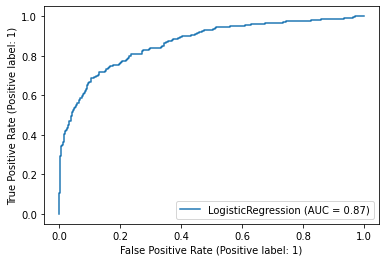

In [45]:
plot_roc_curve(lg, X_train, y_train)

In [46]:
prob_train=lg.predict_proba(X_train)[:,1]
prob_train

array([0.29016962, 0.02724792, 0.01564289, ..., 0.18229476, 0.66754902,
       0.12389009])

In [47]:
prob_test=lg.predict_proba(X_test)[:,1]
prob_test

array([6.87244975e-02, 3.04443087e-03, 2.43235304e-01, 2.07691424e-02,
       1.20300539e-01, 4.37190629e-01, 3.03248049e-01, 2.88358045e-02,
       3.65130501e-02, 8.66380972e-03, 3.99757680e-01, 3.48974644e-02,
       4.06780395e-02, 1.19770153e-01, 1.92519990e-02, 2.25419350e-01,
       1.36785881e-01, 2.69262245e-01, 2.08414538e-01, 5.94744778e-02,
       5.67595324e-01, 3.39149795e-03, 3.31496570e-02, 2.44510505e-01,
       1.47527839e-01, 5.58031862e-03, 7.56682530e-02, 1.97111003e-02,
       5.48255128e-02, 4.28159120e-02, 4.70093027e-03, 2.36570259e-03,
       2.93773406e-03, 2.76054591e-02, 5.80498102e-01, 8.67407625e-03,
       1.31424600e-03, 1.28008664e-01, 7.76273878e-01, 2.28359683e-02,
       5.67058166e-02, 4.48585693e-02, 4.08192231e-02, 3.68365867e-02,
       6.38579269e-01, 5.34582937e-03, 6.67955649e-01, 5.73088670e-01,
       5.82535149e-01, 5.40816783e-01, 8.37094702e-03, 1.18005507e-01,
       1.63442357e-02, 2.38135427e-01, 1.65115222e-01, 2.84429022e-01,
      

# K-S

In [53]:
df_ks_train=pd.DataFrame(list(zip(y_train.tolist(),prob_train)),columns=['Target','Prob'])
df_ks_train

,Target,Prob
0,0,0.290170
1,0,0.027248
2,0,0.015643
3,0,0.014664
4,0,0.086677
...,...,...
1171,0,0.074818
1172,0,0.037584
1173,1,0.182295
1174,0,0.667549


In [54]:
df_ks_test=pd.DataFrame(list(zip(y_test.tolist(),prob_test)),columns=['Target','Prob'])
df_ks_test

,Target,Prob
0,0,0.068724
1,0,0.003044
2,1,0.243235
3,0,0.020769
4,0,0.120301
...,...,...
289,0,0.014748
290,0,0.026135
291,0,0.056592
292,0,0.021154


In [55]:
def ks(data=None,target=None, prob=None):
    data['target0'] = 1 - data[target]
    data['bucket'] = pd.qcut(data[prob], 10)
    grouped = data.groupby('bucket', as_index = False)
    kstable = pd.DataFrame()
    kstable['min_prob'] = grouped.min()[prob]
    kstable['max_prob'] = grouped.max()[prob]
    kstable['events']   = grouped.sum()[target]
    kstable['nonevents'] = grouped.sum()['target0']
    kstable = kstable.sort_values(by="min_prob", ascending=False).reset_index(drop = True)
    kstable['event_rate'] = (kstable.events / data[target].sum()).apply('{0:.2%}'.format)
    kstable['nonevent_rate'] = (kstable.nonevents / data['target0'].sum()).apply('{0:.2%}'.format)
    kstable['cum_eventrate']=(kstable.events / data[target].sum()).cumsum()
    kstable['cum_noneventrate']=(kstable.nonevents / data['target0'].sum()).cumsum()
    kstable['KS'] = np.round(kstable['cum_eventrate']-kstable['cum_noneventrate'], 3) * 100

    #Formating
    kstable['cum_eventrate']= kstable['cum_eventrate'].apply('{0:.2%}'.format)
    kstable['cum_noneventrate']= kstable['cum_noneventrate'].apply('{0:.2%}'.format)
    kstable.index = range(1,11)
    kstable.index.rename('Decile', inplace=True)
    pd.set_option('display.max_columns', 9)
    print(kstable)
    
    #Display KS
    from colorama import Fore
    print(Fore.RED + "KS is " + str(max(kstable['KS']))+"%"+ " at decile " + str((kstable.index[kstable['KS']==max(kstable['KS'])][0])))
    return(kstable)

In [56]:
mydf1 = ks(data=df_ks_train,target="Target", prob="Prob")

        min_prob  max_prob  events  nonevents event_rate nonevent_rate  \
Decile                                                                   
1       0.489911  0.981873      89         29     44.95%         2.97%   
2       0.291765  0.486910      46         71     23.23%         7.26%   
3       0.181568  0.291466      17        101      8.59%        10.33%   
4       0.112774  0.181023      14        103      7.07%        10.53%   
5       0.076588  0.112672      12        106      6.06%        10.84%   
6       0.045248  0.076190       9        108      4.55%        11.04%   
7       0.028747  0.045240       3        115      1.52%        11.76%   
8       0.015643  0.028705       3        114      1.52%        11.66%   
9       0.006624  0.015564       2        116      1.01%        11.86%   
10      0.000127  0.006601       3        115      1.52%        11.76%   

       cum_eventrate cum_noneventrate    KS  
Decile                                       
1             44.95

In [57]:
mydf2 = ks(data=df_ks_test,target="Target", prob="Prob")

        min_prob  max_prob  events  nonevents event_rate nonevent_rate  \
Decile                                                                   
1       0.462798  0.925004      17         13     43.59%         5.10%   
2       0.269262  0.437191       6         23     15.38%         9.02%   
3       0.170303  0.268164       6         23     15.38%         9.02%   
4       0.106750  0.165854       2         28      5.13%        10.98%   
5       0.069602  0.105820       1         28      2.56%        10.98%   
6       0.043271  0.069266       1         28      2.56%        10.98%   
7       0.029355  0.042816       2         28      5.13%        10.98%   
8       0.016344  0.028924       0         29      0.00%        11.37%   
9       0.004701  0.016143       3         26      7.69%        10.20%   
10      0.000447  0.004234       1         29      2.56%        11.37%   

       cum_eventrate cum_noneventrate    KS  
Decile                                       
1             43.59

# Concordance

In [58]:
events=df_ks_train.Target
preds=df_ks_train.Prob
print(df_ks_train)
print(f'Concordance index: {concordance_index(events, preds)}')

      Target      Prob  target0             bucket
0          0  0.290170        1     (0.181, 0.291]
1          0  0.027248        1   (0.0156, 0.0287]
2          0  0.015643        1   (0.0156, 0.0287]
3          0  0.014664        1  (0.00661, 0.0156]
4          0  0.086677        1    (0.0764, 0.113]
...      ...       ...      ...                ...
1171       0  0.074818        1   (0.0452, 0.0764]
1172       0  0.037584        1   (0.0287, 0.0452]
1173       1  0.182295        0     (0.181, 0.291]
1174       0  0.667549        1     (0.488, 0.982]
1175       0  0.123890        1     (0.113, 0.181]

[1176 rows x 4 columns]
Concordance index: 0.865702009873789


In [59]:
test_pred_df=pd.DataFrame(test_pred)

# KS
Test_Data1 = pd.concat([y_test,test_pred_df],axis =1)
Test_Data1.columns =["Dep_flag","Prob"]
Test_Data1.columns
Test_Data1['decile'] = pd.qcut(Test_Data1['Prob'],10,duplicates='')
Test_Data1.head()

Test_Data1.columns = ['Event','Probability','Decile']
Test_Data1.head()

Test_Data1['NonEvent'] = 1-Test_Data1['Event']
Test_Data1.head()

df1=df
df1 =pd.pivot_table(data=Test_Data1,index=['Decile'],values=['Event','NonEvent','Probability'],aggfunc={'Event':[np.sum],'NonEvent': [np.sum],'Probability' : [np.min,np.max]})
df1.head()
df1.reset_index()

df1.columns = ['Event_Count','NonEvent_Count','max_score','min_score']
df1['Total_Cust'] = df1['Event_Count']+df1['NonEvent_Count']
df1
#  Sort the min_score in descending order.

df2 = df1.sort_values(by='min_score',ascending=False)
df2

df2['Event_Rate'] = (df2['Event_Count'] / df2['Total_Cust']).apply('{0:.2%}'.format)
default_sum = df2['Event_Count'].sum()
nonEvent_sum = df2['NonEvent_Count'].sum()
df2['Event %'] = (df2['Event_Count']/default_sum).apply('{0:.2%}'.format)
df2['Non_Event %'] = (df2['NonEvent_Count']/nonEvent_sum).apply('{0:.2%}'.format)
df2


df2['ks_stats'] = np.round(((df2['Event_Count'] / df2['Event_Count'].sum()).cumsum() -(df2['NonEvent_Count'] / df2['NonEvent_Count'].sum()).cumsum()), 4) * 100
df2

flag = lambda x: '*****' if x == df2['ks_stats'].max() else ''
df2['max_ks'] = df2['ks_stats'].apply(flag)
df2
df2.to_csv("ks_test.csv")


In [60]:
df_ks_train

,Target,Prob,target0,bucket
0,0,0.290170,1,"(0.181, 0.291]"
1,0,0.027248,1,"(0.0156, 0.0287]"
2,0,0.015643,1,"(0.0156, 0.0287]"
3,0,0.014664,1,"(0.00661, 0.0156]"
4,0,0.086677,1,"(0.0764, 0.113]"
...,...,...,...,...
1171,0,0.074818,1,"(0.0452, 0.0764]"
1172,0,0.037584,1,"(0.0287, 0.0452]"
1173,1,0.182295,0,"(0.181, 0.291]"
1174,0,0.667549,1,"(0.488, 0.982]"


In [61]:
t=df_ks_train.copy()
t['t1']=1-t['Target']
t=t.sort_values(by="Prob", ascending=False)
t["decile"]=pd.qcut(t["Prob"],10,duplicates="drop",labels=False)

rank_df=t.groupby("decile").agg(
        {"Prob":{"count","min","max"},
        "Target":"sum",
        "t1":"sum"}).reset_index()

rank_df.columns=rank_df.columns.droplevel(0)
rank_df.columns=["decile","max-score","min-score","count","count_1","count_0"]
rank_df=rank_df.sort_values(by="decile",ascending=False)

rank_df["perc1"]=rank_df["count_1"]*100/sum(rank_df["count_1"])
rank_df["perc0"]=rank_df["count_0"]*100/sum(rank_df["count_0"])
rank_df["cum_perc1"]=np.cumsum(rank_df["count_1"])*100/(sum(rank_df["count_1"]))
rank_df["cum_perc0"]=np.cumsum(rank_df["count_0"])*100/(sum(rank_df["count_0"]))
rank_df["KS"]=(rank_df["cum_perc1"]-rank_df["cum_perc0"]).abs()

rank_df=rank_df.reset_index()
rank_df

,index,decile,max-score,min-score,...,perc0,cum_perc1,cum_perc0,KS
0,9,9,118,0.489911,...,2.965235,44.949495,2.965235,41.984260
1,8,8,117,0.291765,...,7.259714,68.181818,10.224949,57.956869
2,7,7,118,0.181568,...,10.327198,76.767677,20.552147,56.215530
3,6,6,117,0.112774,...,10.531697,83.838384,31.083845,52.754539
4,5,5,118,0.076588,...,10.838446,89.898990,41.922290,47.976700
5,4,4,117,0.045248,...,11.042945,94.444444,52.965235,41.479209
6,3,3,118,0.028747,...,11.758691,95.959596,64.723926,31.235670
7,2,2,117,0.015643,...,11.656442,97.474747,76.380368,21.094379
8,1,1,118,0.006624,...,11.860941,98.484848,88.241309,10.243540
9,0,0,118,0.000127,...,11.758691,100.000000,100.000000,0.000000


In [69]:
t=df_ks_test.copy()
t['t1']=1-t['Target']
t=t.sort_values(by="Prob", ascending=False)
t["decile"]=pd.qcut(t["Prob"],10,duplicates="drop",labels=False)

rank_df=t.groupby("decile").agg(
        {"Prob":{"count","min","max"},
        "Target":"sum",
        "t1":"sum"}).reset_index()

rank_df.columns=rank_df.columns.droplevel(0)
rank_df.columns=["decile","max-score","min-score","count","count_1","count_0"]
rank_df=rank_df.sort_values(by="decile",ascending=False)

rank_df["perc1"]=rank_df["count_1"]*100/sum(rank_df["count_1"])
rank_df["perc0"]=rank_df["count_0"]*100/sum(rank_df["count_0"])
rank_df["cum_perc1"]=np.cumsum(rank_df["count_1"])*100/(sum(rank_df["count_1"]))
rank_df["cum_perc0"]=np.cumsum(rank_df["count_0"])*100/(sum(rank_df["count_0"]))
rank_df["KS"]=(rank_df["cum_perc1"]-rank_df["cum_perc0"]).abs()

rank_df=rank_df.reset_index()
rank_df

,index,decile,max-score,min-score,...,perc0,cum_perc1,cum_perc0,KS
0,9,9,30,0.462798,...,5.098039,43.589744,5.098039,38.491704
1,8,8,29,0.269262,...,9.019608,58.974359,14.117647,44.856712
2,7,7,29,0.170303,...,9.019608,74.358974,23.137255,51.221719
3,6,6,30,0.106750,...,10.980392,79.487179,34.117647,45.369532
4,5,5,29,0.069602,...,10.980392,82.051282,45.098039,36.953243
5,4,4,29,0.043271,...,10.980392,84.615385,56.078431,28.536953
6,3,3,30,0.029355,...,10.980392,89.743590,67.058824,22.684766
7,2,2,29,0.016344,...,11.372549,89.743590,78.431373,11.312217
8,1,1,29,0.004701,...,10.196078,97.435897,88.627451,8.808446
9,0,0,30,0.000447,...,11.372549,100.000000,100.000000,0.000000


In [63]:
df_ks_train.Target.value_counts()

0    978
1    198
Name: Target, dtype: int64

In [64]:
event_rate=198/1176
event_rate

0.1683673469387755